In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# reading the time series (pd.Series format)
series = pd.read_csv('all_weather.csv')

tseries = series['t_out']
# you can simulate some data with:
# tseries = pd.Series(np.random.random(100))

rhseries = series['rh_out']

# Heat Wave Index

In [106]:
def C_F(T):
    return (T*9/5) + 32

def F_HI(series):
    # Heat index calculation
    heat_i = []
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783e-03
    c6 = -5.481717e-02
    c7 = 1.22874e-03
    c8 = 8.5282e-04
    c9 = -1.99e-06

    for i in range(len(series)):
        if C_F(series['t_out'][i]) < 80:
            index = 0.5*(C_F(series['t_out'][i]) + 61 + (C_F(series['t_out'][i]) - 68)*1.2 + (series['rh_out'][i]*0.094))
            heat_i.append(index)
            # print(index)
        else:
            index = c1 + c2*C_F(series['t_out'][i]) + c3*series['rh_out'][i] + c4*C_F(series['t_out'][i])*series['rh_out'][i] + c5*C_F(series['t_out'][i])**2 + c6*series['rh_out'][i]**2 + c7*C_F(series['t_out'][i])**2*series['rh_out'][i] + c8*C_F(series['t_out'][i])*series['rh_out'][i]**2 + c9*C_F(series['t_out'][i])**2*series['rh_out'][i]**2
            heat_i.append(index)

    series['heat_index'] = heat_i

    return series

In [107]:
series = F_HI(series)

In [108]:
series['datetime_UTC'] = pd.to_datetime(series['datetime_UTC'], utc=True).dt.tz_convert('America/Los_Angeles')
series['hour_of_day'] = series['datetime_UTC'].dt.hour//3

In [109]:
series.groupby('hour_of_day').describe()

t_out                                                         \
              count       mean       std  min        25%   50%   75%   max   
hour_of_day                                                                  
0            5473.0  12.150574  5.422448 -1.7   8.050000  12.2  16.7  27.8   
1            5477.0  10.948392  5.166993 -2.8   7.200000  11.1  15.0  28.6   
2            5466.0  12.158667  5.654544 -2.8   7.800000  12.2  16.1  31.7   
3            5465.0  18.171585  6.602544  1.1  12.800000  17.8  23.3  40.0   
4            5475.0  22.560403  7.856143  2.5  15.733333  22.8  28.9  44.4   
5            5475.0  22.794368  8.957624  4.2  14.400000  22.8  30.6  45.6   
6            5478.0  17.903926  7.971100  2.8  11.100000  17.2  24.4  41.7   
7            5475.0  14.027463  5.982741  0.6   9.400000  13.9  18.9  32.2   

             rh_out             ...      long           heat_index             \
              count       mean  ...       75%       max      count       mean   
hour_of_day                     ...                                             
0            5473.0  76.790277  ... -121.4944 -121.4944     5473.0  52.567768   
1            5477.0  81.053048  ... -121.4944 -121.4944     5477.0  50.387188   
2            5466.0  77.380300  ... -121.4944 -121.4944     5466.0  52.608323   
3            5465.0  56.562426  ... -121.4944 -121.4944     5465.0  63.425822   
4            5474.0  42.755515  ... -121.4944 -121.4944     5474.0  70.930917   
5            5472.0  42.108258  ... -121.4944 -121.4944     5472.0  71.091625   
6            5478.0  57.236010  ... -121.4944 -121.4944     5478.0  62.790102   
7            5475.0  70.128566  ... -121.4944 -121.4944     5475.0  55.963629   

                                                                                
                   std        min        25%        50%        75%         max  
hour_of_day                                                                     
0            10.341326  25.059517  44.672569  52.585007  61.012764   84.884468  
1             9.939706  23.351486  42.905334  51.006941  58.397674   82.468784  
2            10.767245  23.351486  44.533042  52.926977  60.707389   87.535245  
3            12.231758  31.778000  53.382858  62.874899  73.139363  101.332897  
4            14.021507  34.372074  58.710470  71.416413  82.641503  108.756357  
5            15.778724  37.585683  56.561311  71.922164  84.489890  109.749918  
6            14.538232  33.900960  50.405558  61.590226  74.826001  102.955485  
7            11.281184  29.212381  47.001920  55.566641  64.870853   90.842355  

[8 rows x 40 columns]

In [110]:
# selecting three time periods: 4(12AM - 2PM); 5(3PM - 5PM); 6(6PM - 8PM)
w1series = series[series['hour_of_day'] == 4]
w1series = w1series['heat_index'].values
hist1_wout = np.histogram(w1series[np.isfinite(w1series)], bins=100)
w1out_dist = scipy.stats.rv_histogram(hist1_wout)
print(w1out_dist.pdf(98))

w2series = series[series['hour_of_day'] == 5]
w2series = w2series['heat_index'].values
hist2_wout = np.histogram(w2series[np.isfinite(w2series)], bins=100)
w2out_dist = scipy.stats.rv_histogram(hist2_wout)
print(w2out_dist.pdf(98))

w3series = series[series['hour_of_day'] == 6]
w3series = w3series['heat_index'].values
hist3_wout = np.histogram(w3series[np.isfinite(w3series)], bins=100)
w3out_dist = scipy.stats.rv_histogram(hist3_wout)
print(w3out_dist.pdf(98))

0.0027015108138820584
0.007090713330824312
0.00026435396776454975


In [111]:
q_x = scipy.stats.uniform(90, 20)
q_x.pdf(98)

0.05

/var/folders/ft/7hzjv0495k35n45mr07kxdbh0000gn/T/ipykernel_87886/4000117936.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


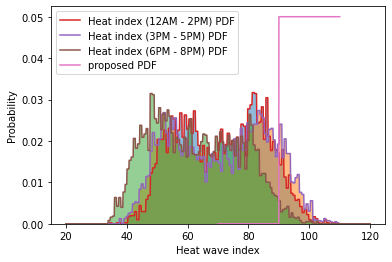

In [112]:
X1 = np.linspace(20, 120, 1000)
X2 = np.linspace(70, 110, 1000)
fig, ax = plt.subplots()
ax.hist(w1series, density=True, bins=100, alpha = 0.5)
ax.hist(w2series, density=True, bins=100, alpha = 0.5)
ax.hist(w3series, density=True, bins=100, alpha = 0.5)
ax.plot(X1, w1out_dist.pdf(X1), label='Heat index (12AM - 2PM) PDF')
ax.plot(X1, w2out_dist.pdf(X1), label='Heat index (3PM - 5PM) PDF')
ax.plot(X1, w3out_dist.pdf(X1), label='Heat index (6PM - 8PM) PDF')
ax.plot(X2, q_x.pdf(X2), label='proposed PDF')
ax.set_xlabel('Heat wave index')
ax.set_ylabel('Probability')
ax.legend()
fig.show()

# Building Energy Profile

In [113]:
data = pd.read_csv("./building_energy/building_energy.csv", compression='gzip')
data['w_out'] = series['heat_index']
data['time'] = pd.to_datetime(data['time'])
data['day_of_week'] = data['time'].dt.day_of_week
data['hour'] = data['time'].dt.hour
data['time_of_week'] = data['hour']//3 + data['day_of_week']*8
data['w_out'] = data['w_out'].interpolate()
data['hour_of_day'] = data['hour']//3

In [114]:
data

,time,towt,w_out,day_of_week,hour,time_of_week,hour_of_day
0,2022-01-01 00:00:00+00:00,34.354263,52.184553,5,0,40,0
1,2022-01-01 01:00:00+00:00,37.222090,49.246490,5,1,40,0
2,2022-01-01 02:00:00+00:00,36.225282,47.275482,5,2,40,0
3,2022-01-01 03:00:00+00:00,35.232485,48.194647,5,3,41,1
4,2022-01-01 04:00:00+00:00,49.310200,46.282304,5,4,41,1
...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00+00:00,43.922532,50.529336,5,19,46,6
8756,2022-12-31 20:00:00+00:00,35.751695,51.714348,5,20,46,6
8757,2022-12-31 21:00:00+00:00,24.368502,51.714348,5,21,47,7
8758,2022-12-31 22:00:00+00:00,24.612971,51.781732,5,22,47,7


In [115]:
X = data[['w_out', 'hour_of_day']].values
y = data['towt']

In [116]:
from sklearn import linear_model
model = linear_model.LinearRegression(normalize = True)
model.fit(X, y)

LinearRegression(normalize=True)

In [117]:
coef = model.coef_
intercept = model.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [1.22322638 1.62925318]
intercept=  -11.002592908981455


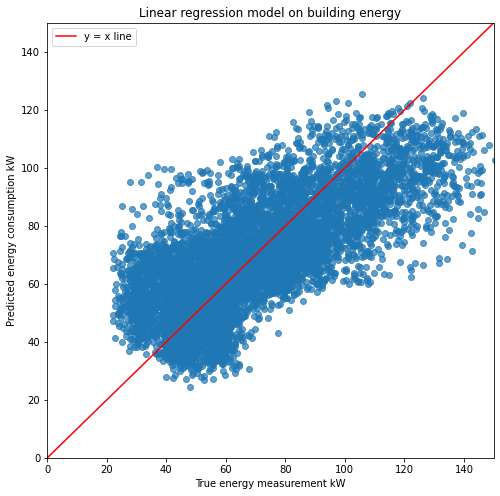

In [118]:
plt.figure(figsize=[8, 8])
plt.scatter(y, model.predict(X), alpha = 0.7)
plt.plot(np.linspace(0, 150, 100), np.linspace(0, 150, 100), 'r', label = 'y = x line')
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.xlabel('True energy measurement kW')
plt.ylabel('Predicted energy consumption kW')
plt.title("Linear regression model on building energy")
plt.legend()

In [119]:
# # Fit building energy distribution
# energy_series = data['towt']
# hist = np.histogram(energy_series[np.isfinite(energy_series)], bins=100)
# build_dist = scipy.stats.rv_histogram(hist)

# # Visualize building energy and EV power distribution
# X1 = np.linspace(0, 150, 1000)
# fig, ax = plt.subplots()
# ax.hist(energy_series, density=True, bins=100)
# ax.plot(X1, build_dist.pdf(X1), label='True PDF')
# ax.set_xlabel('Energy consumption kW')
# ax.set_ylabel('Probability')
# ax.set_title('Building energy consumption density plot')
# ax.legend()
# fig.show()

In [120]:
energy_series1 = data[data['hour_of_day'] == 4]['towt']
energy_series2 = data[data['hour_of_day'] == 5]['towt']
energy_series3 = data[data['hour_of_day'] == 6]['towt']

61.53546387174902
73.90702903390144
85.22253648669063


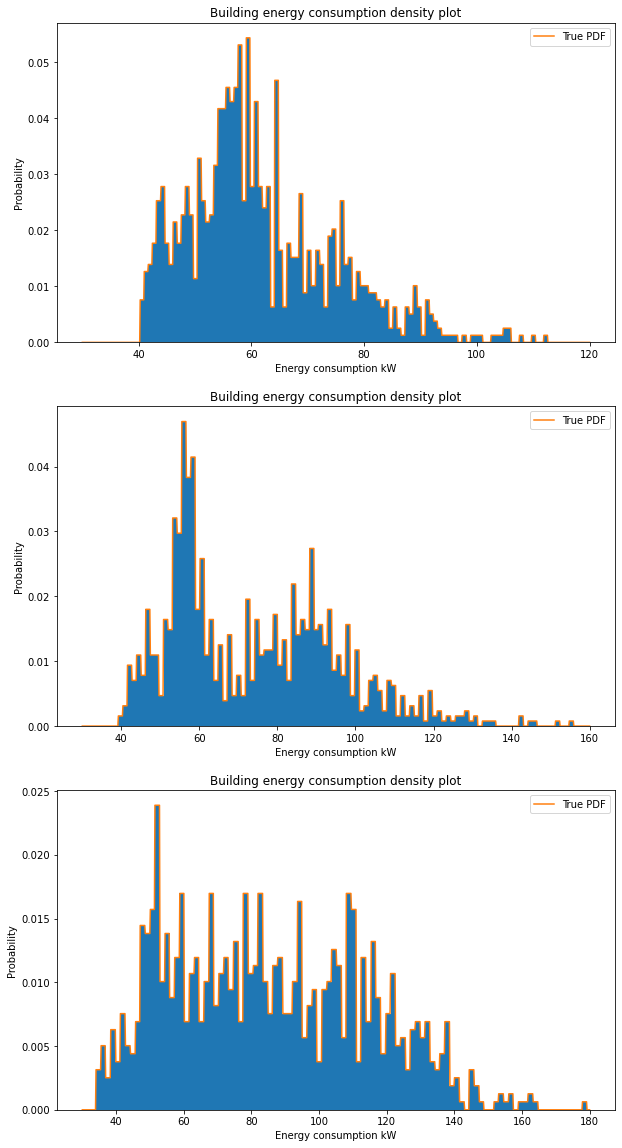

In [121]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
X1 = np.linspace(30, 120, 1000)
hist = np.histogram(energy_series1[np.isfinite(energy_series1)], bins=100)
build_dist1 = scipy.stats.rv_histogram(hist)
ax[0].hist(energy_series1, density=True, bins=100)
ax[0].plot(X1, build_dist1.pdf(X1), label='True PDF')
ax[0].set_xlabel('Energy consumption kW')
ax[0].set_ylabel('Probability')
ax[0].set_title('Building energy consumption density plot')
ax[0].legend()
print(np.mean(energy_series1))

X1 = np.linspace(30, 160, 1000)
hist = np.histogram(energy_series2[np.isfinite(energy_series2)], bins=100)
build_dist2 = scipy.stats.rv_histogram(hist)
ax[1].hist(energy_series2, density=True, bins=100)
ax[1].plot(X1, build_dist2.pdf(X1), label='True PDF')
ax[1].set_xlabel('Energy consumption kW')
ax[1].set_ylabel('Probability')
ax[1].set_title('Building energy consumption density plot')
ax[1].legend()
print(np.mean(energy_series2))

X1 = np.linspace(30, 180, 1000)
hist = np.histogram(energy_series3[np.isfinite(energy_series3)], bins=100)
build_dist3 = scipy.stats.rv_histogram(hist)
ax[2].hist(energy_series3, density=True, bins=100)
ax[2].plot(X1, build_dist3.pdf(X1), label='True PDF')
ax[2].set_xlabel('Energy consumption kW')
ax[2].set_ylabel('Probability')
ax[2].set_title('Building energy consumption density plot')
ax[2].legend()
print(np.mean(energy_series3))

# EV Charging

In [122]:
# # Assume EV SOC
# SOC_x = scipy.stats.uniform(low=20, high=80)
# SOC_x.pdf(25)

In [123]:
# define function EV
def EV_status(SOC, DR):
    """
    This is a function defined to simulate EV charging and discharging process

    Args:
        SOC: EV level of SOC (array)
        DR: weather DR is activated

    Returns:
        EV: Total power output from EV charging/discharging simulation (negative: net EV discharging)
        SOC_nex: EV level of SOC after the hour (array)
    """
    EV = 0
    SOC_next = []
    if DR == True:
        for i in SOC:
            if i > 50:
                # Assume discharging rate 2kW/hr
                EV = EV - 0
                SOC_next.append(i - 1)
            else:
                EV = EV
        return EV, SOC_next
    else:
        for i in SOC:
            # Assume charging rate 5kW/hr
            EV = EV + 15
            SOC_next.append(i + 1)
        return EV, SOC_next


In [124]:
# define function f(x)
def process(X, EV, DR, curtail = 0.15):
    """
    This is a function defined to simulate the functions (or actions) after the DR events

    Args:
        DR: weather DR is activated
        X: energy model prediction input (time_of_week, t_out)
        EV: EV charging
        curtail: expected curtailment level (default set as 15%)
    
    Returns:
        total: the total energy consumption of EV and building
        residual: Remaining energy curtailment load after combining EV action
    """
    build_energy = model.predict(X)

    if DR == True:
        curtailment = build_energy * curtail 
        total = build_energy + EV
        residual = curtailment + EV
        return total, residual
    else:
        total = build_energy + EV

        # Residual = 0 also indicates no DR event
        residual = 0
        return total, residual



# Simulation on EV and Building

In [125]:
total_energy = []
residual_energy = []
for i in range(1000):
    condition = False
    total = []
    residual = []

    # Assume 5 EV
    SOC_next = np.random.uniform(low = 20, high = 80, size = 5)

    # 10AM - 2PM DR simulation on EV and building
    for j in range(4, 7):
        w1_out = w1out_dist.rvs(size = 1)[0]
        X = [[w1_out, j]]

        # threshold set as heat wave index >= 95
        if w1_out >= 95:
            condition = True

        EV, SOC_next = EV_status(SOC_next, condition)
        total_temp, residual_temp = process(X, EV, condition)
            
        total.append(total_temp)
        residual.append(residual_temp)
    
    total_energy.append(total)
    residual_energy.append(residual)


# With important sampling

In [126]:
from tqdm import tqdm
total_energy = []
residual_energy = []

for i in tqdm(range(1000)):
    total = []
    residual = []

    # Assume 5 EV
    SOC_next = np.random.uniform(low = 20, high = 80, size = 5)

    # 12AM - 2PM DR simulation on EV and building
    condition = False
    total_temp = 0
    vec_weight = []
    for k in range(100):
        w1_out = q_x.rvs(size = 1)[0]
        X = [[w1_out, 4]]
        q_density = q_x.pdf(w1_out)
        true_density = w1out_dist.pdf(w1_out)
        w_coef = true_density/q_density
        vec_weight.append(w_coef)

        # threshold set as heat wave index >= 95
        if w1_out >= 95:
            condition = True
    
        EV, SOC_next = EV_status(SOC_next, condition)
        temp, residual_temp = process(X, EV, condition)
        total_temp = total_temp + temp*w_coef
    
    total_temp = total_temp/sum(vec_weight)
        
    total.append(total_temp)
    residual.append(residual_temp)

    SOC_next = np.random.uniform(low = 20, high = 80, size = 5)

    # 3PM - 5PM DR simulation on EV and building
    condition = False
    total_temp = 0
    vec_weight = []
    for k in range(100):
        w2_out = q_x.rvs(size = 1)[0]
        X = [[w2_out, 5]]
        q_density = q_x.pdf(w2_out)
        true_density = w2out_dist.pdf(w2_out)
        w_coef = true_density/q_density
        vec_weight.append(w_coef)

        # threshold set as heat wave index >= 95
        if w2_out >= 95:
            condition = True

        EV, SOC_next = EV_status(SOC_next, condition)
        temp, residual_temp = process(X, EV, condition)
        total_temp = total_temp + temp*w_coef
    
    total_temp = total_temp/sum(vec_weight)
        
    total.append(total_temp)
    residual.append(residual_temp)

    SOC_next = np.random.uniform(low = 20, high = 80, size = 5)
    
    # 5PM - 7PM DR simulation on EV and building
    condition = False
    total_temp = 0
    vec_weight = []
    for k in range(100):
        w3_out = q_x.rvs(size = 1)[0]
        X = [[w3_out, 6]]
        q_density = q_x.pdf(w3_out)
        true_density = w3out_dist.pdf(w3_out)
        w_coef = true_density/q_density
        vec_weight.append(w_coef)

        # threshold set as heat wave index >= 95
        if w3_out >= 95:
            condition = True

        EV, SOC_next = EV_status(SOC_next, condition)
        temp, residual_temp = process(X, EV, condition)
        total_temp = total_temp + temp*w_coef
    
    total_temp = total_temp/sum(vec_weight)
        
    total.append(total_temp)
    residual.append(residual_temp)
    
    total_energy.append(total)
    residual_energy.append(residual)

100%|██████████| 1000/1000 [00:52<00:00, 19.17it/s]


In [127]:
df_1 = pd.DataFrame(np.asarray(total_energy)[:, 0].reshape(1, -1)[0])
df_2 = pd.DataFrame(np.asarray(total_energy)[:, 1].reshape(1, -1)[0])
df_3 = pd.DataFrame(np.asarray(total_energy)[:, 2].reshape(1, -1)[0])
energy_df = pd.concat([df_1, df_2, df_3], axis=1)
energy_df.columns = ['4', '5', '6']

In [128]:
max(energy_df['5'])

123.27018072617975

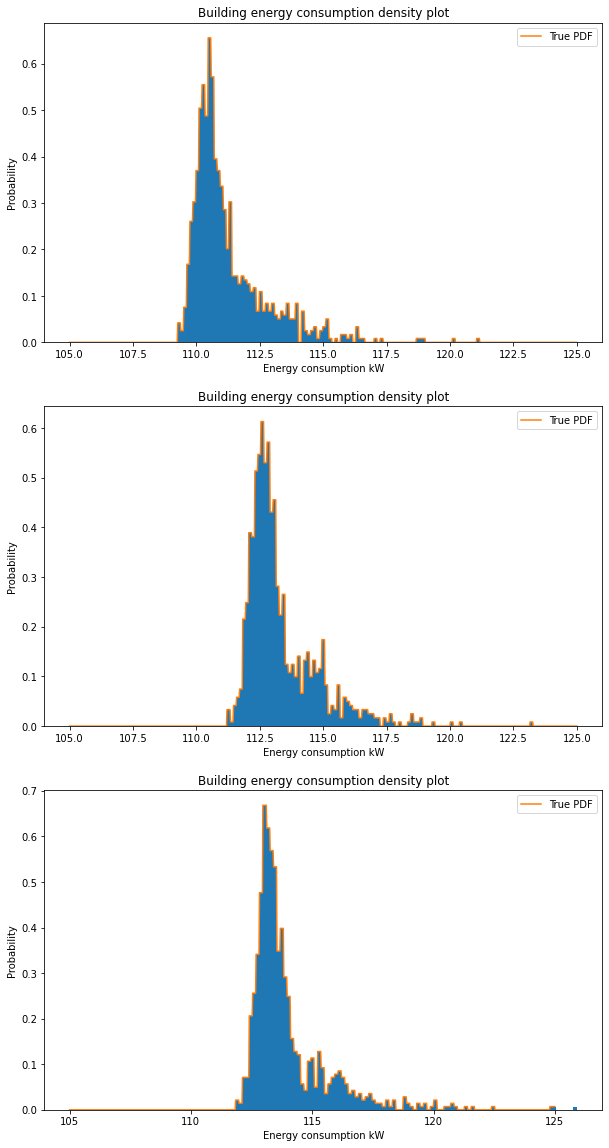

In [131]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
X1 = np.linspace(105, 125, 1000)
hist = np.histogram(energy_df['4'].values, bins=100)
build_dist1 = scipy.stats.rv_histogram(hist)
ax[0].hist(energy_df['4'].values, density=True, bins=100)
ax[0].plot(X1, build_dist1.pdf(X1), label='True PDF')
ax[0].set_xlabel('Energy consumption kW')
ax[0].set_ylabel('Probability')
ax[0].set_title('Building energy consumption density plot')
ax[0].legend()

X1 = np.linspace(105, 125, 1000)
hist = np.histogram(energy_df['5'].values, bins=100)
build_dist2 = scipy.stats.rv_histogram(hist)
ax[1].hist(energy_df['5'].values, density=True, bins=100)
ax[1].plot(X1, build_dist2.pdf(X1), label='True PDF')
ax[1].set_xlabel('Energy consumption kW')
ax[1].set_ylabel('Probability')
ax[1].set_title('Building energy consumption density plot')
ax[1].legend()

X1 = np.linspace(105, 125, 1000)
hist = np.histogram(energy_df['6'].values, bins=100)
build_dist3 = scipy.stats.rv_histogram(hist)
ax[2].hist(energy_df['6'].values, density=True, bins=100)
ax[2].plot(X1, build_dist3.pdf(X1), label='True PDF')
ax[2].set_xlabel('Energy consumption kW')
ax[2].set_ylabel('Probability')
ax[2].set_title('Building energy consumption density plot')
ax[2].legend()

In [130]:
energy_df.mean()

4    111.249336
5    113.323010
6    113.997428
dtype: float64

# Sequential Monte Carlo Simulation

In [21]:
# Assuming EV charging distribution
from scipy.stats import uniform
from scipy.stats import norm

EV_charging = norm(50,10)
EV_discharge = norm(-30, 5)

In [25]:
class CurtailmentEstimateModel():
    '''
    Defines the model with 1 free params (Curtailment ratio)
    '''

    def __init__(self, EVcharge_dist, EVdischarge_dist):

        self.EV_charge = EVcharge_dist
        self.EV_discharge = EVdischarge_dist
    
    def evaluate_EV_BiCharging(self, params):
        
        results = []
        for p in params:
            E = p
            result = E + self.EV_charge.rvs(size = 1) + self.EV_discharge.rvs(size = 1) 
            
            results.append(result)
        return np.array(results)
    
    def evaluate_EV_Charging(self, params):
        
        results = []
        for p in params:
            E = p
            result = E + self.EV_charge.rvs(size = 1) 
            
            results.append(result)
        return np.array(results)
    
    def evaluate(self, params):
        results = []
        for p in params:
            E = p
            result = E
            results.append(result)

        return np.array(results)

[ mutation ratio: 0.99254: : 100.00%|██████████| phi: 1.00000/1.0 [01:07<00:00

marginal log likelihood = -4345.963935255958
parameter means = {'E': 67.37181126947051}


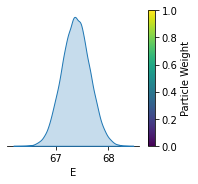

In [26]:
from smcpy.utils.plotter import plot_pairwise
from smcpy import AdaptiveSampler as Sampler
from smcpy import VectorMCMC, VectorMCMCKernel


# Initialize model
curtailment_model = CurtailmentEstimateModel(EV_charging, EV_discharge)

# Load data
std_dev = 25
building_data = data['towt'].tolist()

# Define prior distributions & MCMC kernel
priors = [norm(60, 25)]
vector_mcmc = VectorMCMC(curtailment_model.evaluate, building_data, priors, std_dev)
mcmc_kernel = VectorMCMCKernel(vector_mcmc, param_order=('E'))

# SMC sampling
smc = Sampler(mcmc_kernel)
step_list, mll_list = smc.sample(num_particles=500,
                                 num_mcmc_samples=5)

# Display results
print(f'marginal log likelihood = {mll_list[-1]}')
print(f'parameter means = {step_list[-1].compute_mean()}')

plot_pairwise(step_list[-1].params, step_list[-1].weights, save=True,
              param_names=['E'])

[ mutation ratio: 0.99338: : 100.00%|██████████| phi: 1.00000/1.0 [02:17<00:00 

marginal log likelihood = -4345.963316419708
parameter means = {'E': 67.37258736915763}


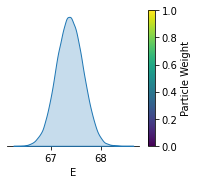

In [27]:
from smcpy.utils.plotter import plot_pairwise
from smcpy import AdaptiveSampler as Sampler
from smcpy import VectorMCMC, VectorMCMCKernel


# Initialize model
curtailment_model = CurtailmentEstimateModel(EV_charging, EV_discharge)

# Load data
std_dev = 25
building_data = data['towt'].tolist()

# Define prior distributions & MCMC kernel
priors = [norm(60, 25)]
vector_mcmc = VectorMCMC(curtailment_model.evaluate_EV_Charging, building_data, priors, std_dev)
mcmc_kernel = VectorMCMCKernel(vector_mcmc, param_order=('E'))

# SMC sampling
smc = Sampler(mcmc_kernel)
step_list, mll_list = smc.sample(num_particles=500,
                                 num_mcmc_samples=5)

# Display results
print(f'marginal log likelihood = {mll_list[-1]}')
print(f'parameter means = {step_list[-1].compute_mean()}')

plot_pairwise(step_list[-1].params, step_list[-1].weights, save=True,
              param_names=['E'])

In [ ]:
# Initialize model
state = 0
curtailment_model = CurtailmentEstimateModel(EV_charging, EV_discharge)

# Load data
std_dev = 25
building_data = data['towt'].tolist()

# Define prior distributions & MCMC kernel
priors = [norm(60, 10)]
vector_mcmc = VectorMCMC(curtailment_model.evaluate_EV_BiCharging, building_data, priors, std_dev)
mcmc_kernel = VectorMCMCKernel(vector_mcmc, param_order=('E'))

# SMC sampling
smc = Sampler(mcmc_kernel)
step_list, mll_list = smc.sample(num_particles=500,
                                 num_mcmc_samples=5)

# Display results
print(f'marginal log likelihood = {mll_list[-1]}')
print(f'parameter means = {step_list[-1].compute_mean()}')

plot_pairwise(step_list[-1].params, step_list[-1].weights, save=True,
              param_names=['E'])

<AxesSubplot:>

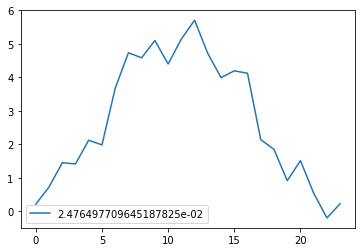

In [23]:
pd.read_csv('Example/noisy_data.txt').plot()

(22.18650189978103, 179.2346981642903, 24.87732535586826)

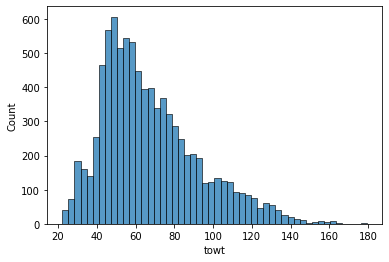

In [32]:
import seaborn as sns

sns.histplot(data['towt'])
min(data['towt']), max(data['towt']), np.std(data['towt'])

In [33]:
len(data['towt'])

8760

<AxesSubplot:ylabel='Count'>

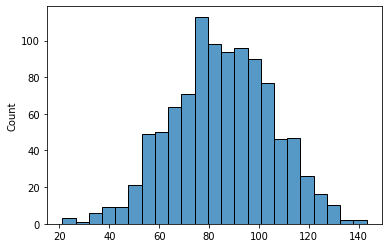

In [39]:
sns.histplot(norm(85,20).rvs(size=1000))